In [1]:
import pandas as pd

# Load the dataset
file_path = 'section_12.csv'
license_data = pd.read_csv(file_path)

# Data Preprocessing
license_data['issued'] = pd.to_datetime(license_data['issued'], errors='coerce')
license_data['expires'] = pd.to_datetime(license_data['expires'], errors='coerce')

In [2]:
license_data.head()

,license_num,historicallicensenum,status,license_type,issued,expires,business_name,dba_name,comments,location_comments,...,applicant,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy
0,LB-532274,NaN,Active,CV7MWLN - Neighborhood Restricted,NaT,NaT,"Venice Pizza, LLC",Venice Pizza,NaN,First floor contains a dining room that seats ...,...,"Venice Pizza, LLC",JOSHUA WINER,NaN,7815968380,33-39 Savin Hill AV,Dorchester,MA,2125,775878.427831,2.939327e+06
1,LB-569775,NaN,Active,Retail Malt Wine,2024-10-16,2025-12-31,Alina Morris,DJ's Market,1 No singles 2 increase to amount floor space ...,Market and deli consist of 1864 SF of retail o...,...,Alina Morris,Alina Morris,(617)436-9766,NaN,120- Boston ST,Dorchester,MA,2125,775467.999847,2.943930e+06
2,LB-566967,NaN,Active,Retail Malt Wine,2024-09-26,2025-12-31,Tandav Corporation,Old Harbor Market,Conditions 1 No singles 2 increase to amount f...,NaN,...,Tandav Corporation,Devyani Patel,(617)269-7222,NaN,334- E Eighth ST,South Boston,MA,2127,778489.836651,2.946100e+06
3,LB-567239,NaN,Active,Retail Malt Wine,2024-09-18,2024-12-31,"Boardeaux BOS, LLC",NaN,NaN,NaN,...,"Boardeaux BOS, LLC",Monisha Misra,(806)786-1885,NaN,160- Federal ST,Boston,MA,2110,776199.131586,2.954357e+06
4,LB-519530,NaN,Active,CV7 All Alc.,2024-08-30,2024-12-31,"El Punto Restaurant & Lounge, LLC",El Punto Restaurant & Lounge,NaN,"The building consists of 7,380SF on first floo...",...,"El Punto Restaurant & Lounge, LLC",Maricelle Nieves-Allende,(617)840-7843,NaN,879-881 Blue Hill AV,Dorchester,MA,2124,767605.688800,2.932919e+06


In [3]:
license_data.info

<bound method DataFrame.info of      license_num historicallicensenum  status  \
0      LB-532274                  NaN  Active   
1      LB-569775                  NaN  Active   
2      LB-566967                  NaN  Active   
3      LB-567239                  NaN  Active   
4      LB-519530                  NaN  Active   
...          ...                  ...     ...   
1472   LB-101596            GOPWM0004  Active   
1473   LB-101611           GOPWML0009  Active   
1474   LB-101610           GOPWML0008  Active   
1475   LB-102883           SPCMWA0001  Active   
1476    LB-98819           CLBALA0002  Active   

                           license_type     issued    expires  \
0     CV7MWLN - Neighborhood Restricted        NaT        NaT   
1                      Retail Malt Wine 2024-10-16 2025-12-31   
2                      Retail Malt Wine 2024-09-26 2025-12-31   
3                      Retail Malt Wine 2024-09-18 2024-12-31   
4                          CV7 All Alc. 2024-08-30 202

In [4]:
license_data.columns

Index(['license_num', 'historicallicensenum', 'status', 'license_type',
       'issued', 'expires', 'business_name', 'dba_name', 'comments',
       'location_comments', 'opening', 'closing', 'patronsout', 'capacity',
       'applicant', 'manager', 'day_phone', 'evening_phone', 'address', 'city',
       'state', 'zip', 'gpsx', 'gpsy'],
      dtype='object')

In [5]:
# Measure of Vibrancy
def calculate_vibrancy(data):
    # Grouping by neighborhood (city) and aggregating data
    data['city_normalized'] = data['city'].str.title()
    vibrancy = (
        data.groupby('city_normalized')
        .agg(
            active_licenses=('status', lambda x: (x == 'Active').sum()),
            license_diversity=('license_type', 'nunique'),
            avg_capacity=('capacity', 'mean'),
        )
        .reset_index()
    )
    
    # Normalizing and creating a composite vibrancy score
    vibrancy['vibrancy_score'] = (
        vibrancy['active_licenses'] +
        vibrancy['license_diversity'] * 2 +  # Weighted more for diversity
        vibrancy['avg_capacity'] / 10       # Scaled down
    )
    return vibrancy

# Calculate Vibrancy
vibrancy_data = calculate_vibrancy(license_data)

In [6]:
vibrancy_data

,city_normalized,active_licenses,license_diversity,avg_capacity,vibrancy_score
0,Allston,52,8,92.788462,77.278846
1,Boston,764,22,469.208115,854.920812
2,Brighton,54,12,153.814815,93.381481
3,Charlestown,31,9,112.903226,60.290323
4,Chestnut Hill,3,3,89.333333,17.933333
5,Dorchester,115,14,127.043478,155.704348
6,East Boston,137,20,370.262774,214.026277
7,Hyde Park,22,9,44.681818,44.468182
8,Jamaica Plain,42,10,47.404762,66.740476
9,Mattapan,11,4,38.818182,22.881818


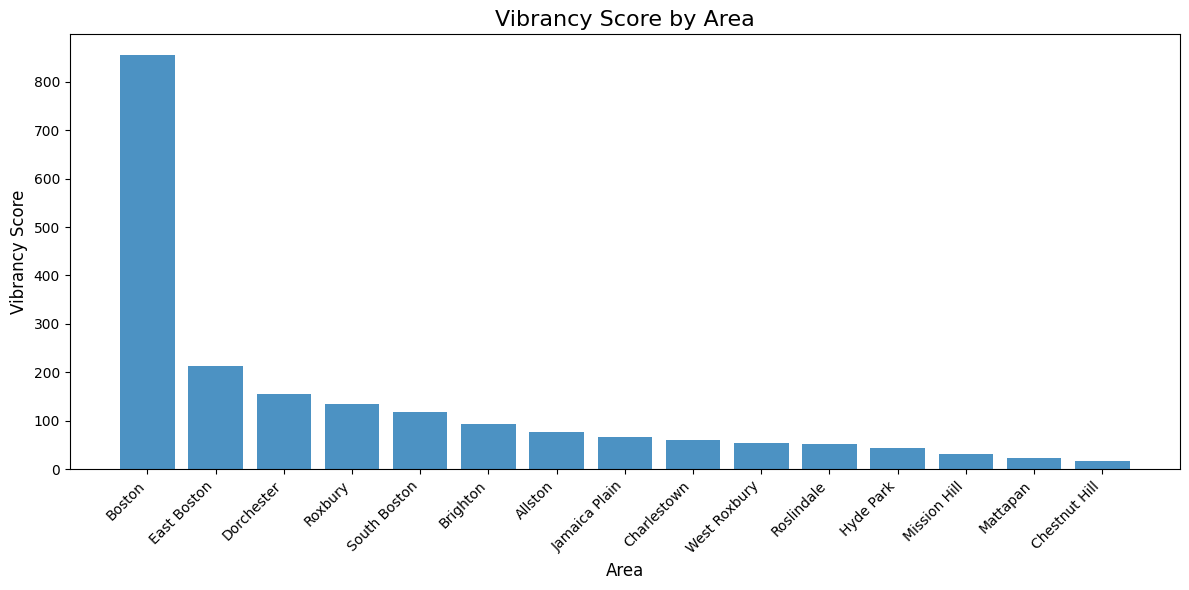

In [18]:
import matplotlib.pyplot as plt

vibrancy_data_sorted = vibrancy_data.sort_values(by='vibrancy_score', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(vibrancy_data_sorted['city_normalized'], vibrancy_data_sorted['vibrancy_score'], alpha=0.8)
plt.title('Vibrancy Score by Area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Vibrancy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

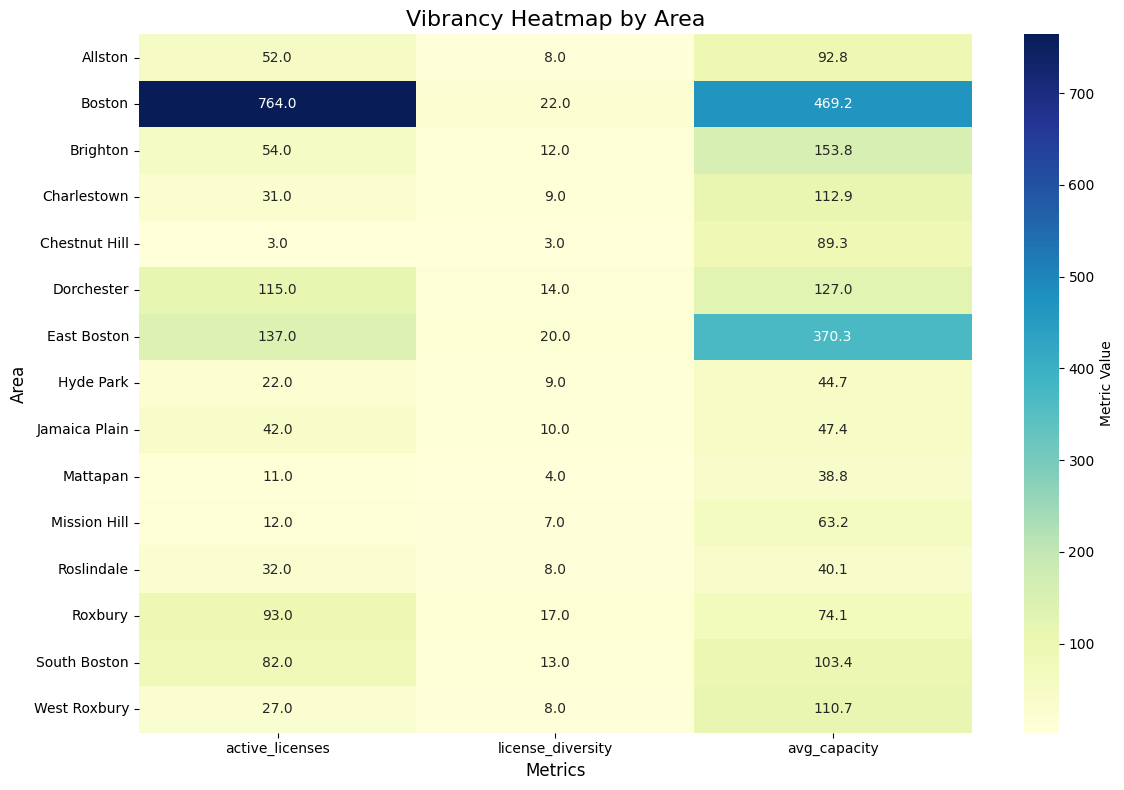

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = vibrancy_data.set_index('city_normalized').drop(columns=['vibrancy_score'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Metric Value'}
)
plt.title('Vibrancy Heatmap by Area', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()

### Filtering out for only district 7

In [10]:
import geopandas as gpd
from shapely.geometry import Point

# List of census tracts to filter
census_tracts_list = [
    '25025080601', '25025010403', '25025070700', '25025010300', '25025981100',
    '25025120201', '25025980300', '25025010404', '25025010405', '25025080100',
    '25025120301', '25025071101', '25025091300', '25025010500', '25025110105',
    '25025010206', '25025081301', '25025081302', '25025070502', '25025082100',
    '25025010600', '25025070600', '25025080300', '25025080401', '25025080500',
    '25025080801', '25025080900', '25025081400', '25025081500', '25025081700',
    '25025081800', '25025081900', '25025082000', '25025090100', '25025090200',
    '25025090300', '25025090400', '25025090600', '25025090700', '25025091400',
    '25025092400', '25025070902', '25025070802', '25025070801', '25025070901'
]

boston = gpd.read_file("C:/Users/ishan/Desktop/ISHANAY/BU docs/Fall 2024/CDS DS701(Tools for DS)/Project district 7/Boston_census_tract.geojson")

# Filtering `boston` using the list of census tracts
filtered_d7 = boston[boston['geoid20'].isin(census_tracts_list)]  

# Converting License Data to GeoDataFrame
license_data['geometry'] = license_data.apply(lambda row: Point(row['gpsx'], row['gpsy']), axis=1)
license_gdf = gpd.GeoDataFrame(license_data, geometry='geometry', crs="EPSG:2249")
filtered_d7 = filtered_d7.to_crs(license_gdf.crs)

# Spatial Join: Map licenses to the filtered census tracts
filtered_licenses = gpd.sjoin(license_gdf, filtered_d7, how="inner", predicate="intersects")
filtered_d7 = filtered_licenses.drop(columns='geometry')

In [11]:
filtered_d7.head()

,license_num,historicallicensenum,status,license_type,issued,expires,business_name,dba_name,comments,location_comments,...,statefp20,tractce20,intptlat20,name20,funcstat20,intptlon20,mtfcc20,aland20,awater20,objectid
1,LB-569775,NaN,Active,Retail Malt Wine,2024-10-16,2025-12-31,Alina Morris,DJ's Market,1 No singles 2 increase to amount floor space ...,Market and deli consist of 1864 SF of retail o...,...,25,090700,+42.3241150,907,S,-071.0600141,G5020,1073065,0,164
4,LB-519530,NaN,Active,CV7 All Alc.,2024-08-30,2024-12-31,"El Punto Restaurant & Lounge, LLC",El Punto Restaurant & Lounge,NaN,"The building consists of 7,380SF on first floo...",...,25,092400,+42.2960408,924,S,-071.0849902,G5020,594486,0,175
6,LB-545988,NaN,Active,CV7MWN - Neighborhood Restricted,2024-08-16,2024-12-31,Lepe Food Service LLC,La Cuchara,NaN,NaN,...,25,082000,+42.3137479,820,S,-071.0839483,G5020,392156,0,158
17,LB-541579,NaN,Active,CV7ALN - Neighborhood Restricted,2024-01-02,2024-12-31,General Admission LLC,Victoria's Diner,Capacity Breakdown 45 Basement 61 Dining Room ...,"First floor (+/- 3,476 S.F.) consisting of two...",...,25,080100,+42.3293312,801,S,-071.0705295,G5020,1026664,0,61
30,LB-485388,NaN,Active,Inn. All Alc.,2023-08-25,2024-12-31,Trinity Stuart Concessions LLC,The Raffles Hotel,NaN,"A 35 floor hotel and residences (400,000SF) wi...",...,25,010600,+42.3476422,106,S,-071.0793745,G5020,339678,0,130


In [12]:
filtered_d7.info

<bound method DataFrame.info of      license_num historicallicensenum  status  \
1      LB-569775                  NaN  Active   
4      LB-519530                  NaN  Active   
6      LB-545988                  NaN  Active   
17     LB-541579                  NaN  Active   
30     LB-485388                  NaN  Active   
...          ...                  ...     ...   
1423   LB-102042            RETMW0072  Active   
1425    LB-99780           CV7MWL0128  Active   
1427    LB-99064            CV7AL0200  Active   
1456   LB-101976            RETAL0207  Active   
1470   LB-101595            GOPWM0001  Active   

                          license_type     issued    expires  \
1                     Retail Malt Wine 2024-10-16 2025-12-31   
4                         CV7 All Alc. 2024-08-30 2024-12-31   
6     CV7MWN - Neighborhood Restricted 2024-08-16 2024-12-31   
17    CV7ALN - Neighborhood Restricted 2024-01-02 2024-12-31   
30                       Inn. All Alc. 2023-08-25 2024-12-3

In [13]:
vibrancy_data_d7 = calculate_vibrancy(filtered_d7)

In [14]:
vibrancy_data_d7

,city_normalized,active_licenses,license_diversity,avg_capacity,vibrancy_score
0,Boston,94,10,1156.702128,229.670213
1,Dorchester,27,8,95.666667,52.566667
2,Jamaica Plain,14,7,54.857143,33.485714
3,Mission Hill,10,6,74.000000,29.400000
4,Roxbury,62,14,45.241935,94.524194


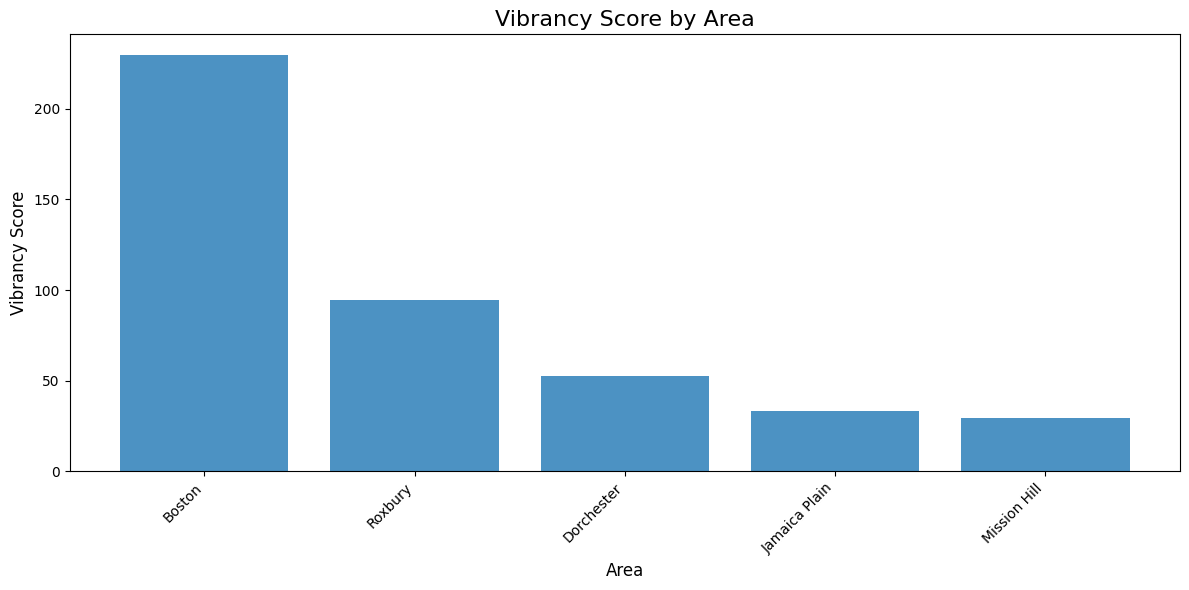

In [15]:
import matplotlib.pyplot as plt

vibrancy_data_sorted_d7 = vibrancy_data_d7.sort_values(by='vibrancy_score', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(vibrancy_data_sorted_d7['city_normalized'], vibrancy_data_sorted_d7['vibrancy_score'], alpha=0.8)
plt.title('Vibrancy Score by Area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Vibrancy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

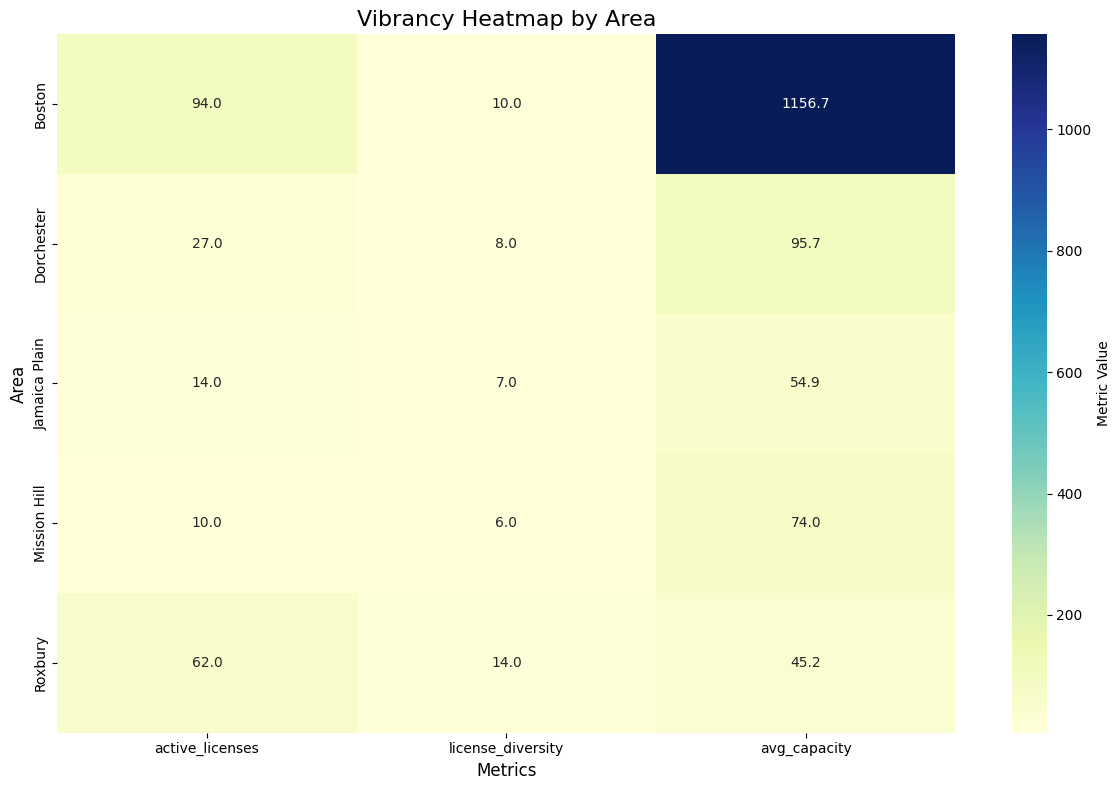

In [16]:
heatmap_data_d7 = vibrancy_data_d7.set_index('city_normalized').drop(columns=['vibrancy_score'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_d7, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Metric Value'}
)
plt.title('Vibrancy Heatmap by Area', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()